In [ ]:
!git clone https://github.com/alessandrosebastianelli/OnBoardVolcanicEruptionDetection.git

In [1]:
%pwd

'c:\\Users\\Park se woong\\Desktop\\Module_volcano'

(381, 383, 3)


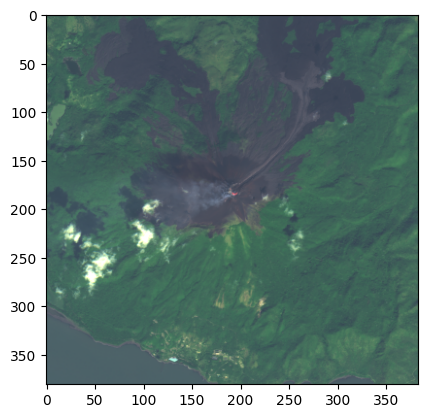

(395, 396, 3)


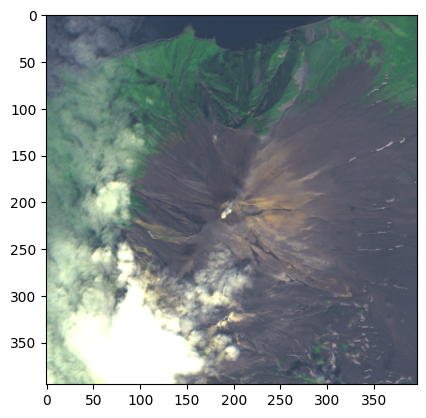

(384, 386, 3)


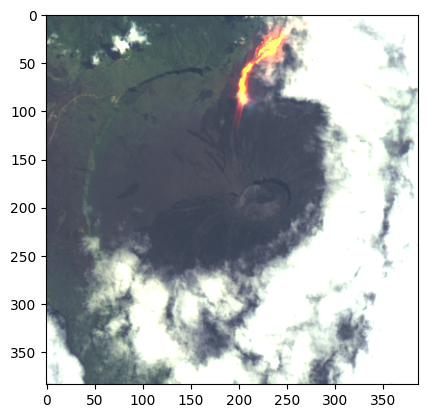

(382, 383, 3)


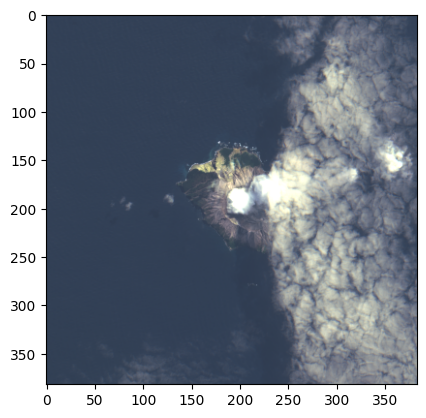

(381, 384, 3)


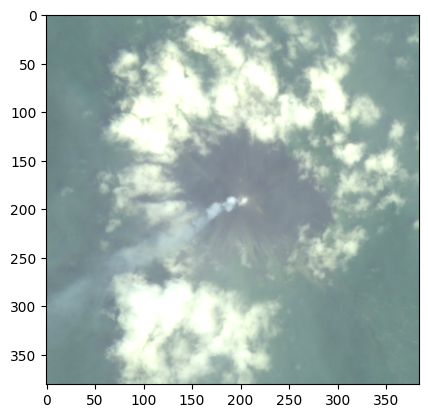

(387, 389, 3)


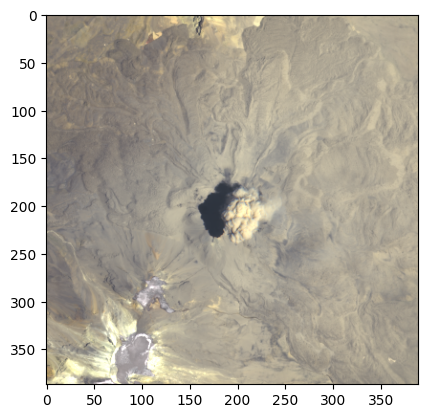

(380, 383, 3)


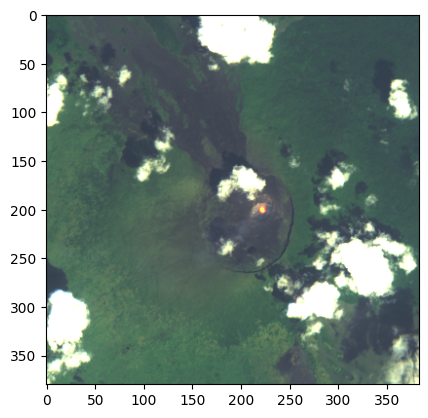

(382, 384, 3)


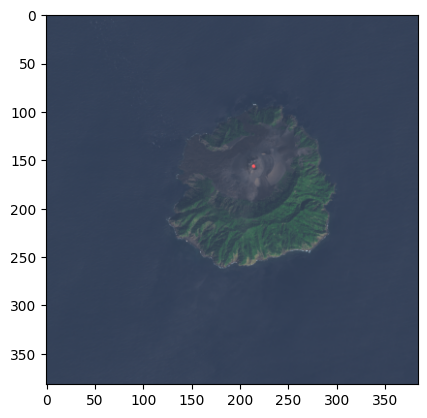

(382, 384, 3)


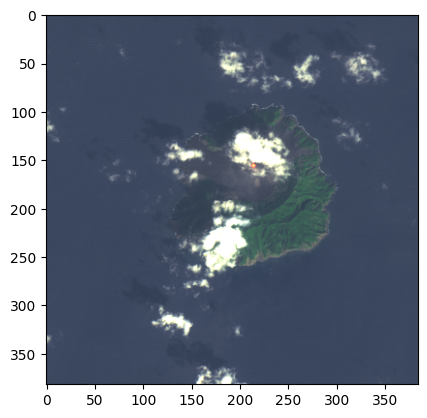

(384, 386, 3)


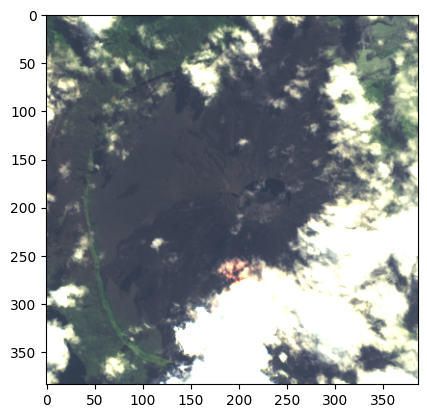

In [27]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

file_path = glob.glob("./OnBoardVolcanicEruptionDetection/data_reviewed/training/eruption/*.png")
for img in file_path[:10]:
  img = img.replace('\\', '/')
  img = Image.open(img)
  print(np.shape(np.array(img)))
  plt.imshow(img)
  plt.show()
  


In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_convolutional_layers():
    model = models.Sequential()
    # 첫 번째 컨볼루션 레이어부터 7개의 컨볼루션 레이어까지 생성
    for filters in [16, 32, 64, 128, 256, 384, 512]:
        model.add(layers.Conv2D(filters, (3, 3), strides=(1, 1), padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.ReLU())
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    return model

def create_fully_connected_layers():
    model = models.Sequential()
    # 첫 번째 완전 연결 레이어부터 5개의 완전 연결 레이어까지 생성
    units = [1024, 512, 256, 128, 64]
    for unit in units:
        model.add(layers.Dense(unit))
        model.add(layers.ReLU())
        model.add(layers.Dropout(0.5))
    return model

def build_model(input_shape):
    # 첫 번째 서브 네트워크(컨볼루션 레이어)
    conv_model = create_convolutional_layers()
    
    # 두 번째 서브 네트워크(완전 연결 레이어)
    fc_model = create_fully_connected_layers()
    
    # 전연결 풀링 레이어
    global_avg_pool = layers.GlobalAveragePooling2D()
    
    # 모델 생성
    inputs = layers.Input(shape=input_shape)
    conv_output = conv_model(inputs)
    fc_output = fc_model(conv_output)
    global_avg_output = global_avg_pool(conv_output)
    merged_output = layers.concatenate([fc_output, global_avg_output])
    output = layers.Dense(num_classes, activation='softmax')(merged_output)
    
    model = models.Model(inputs=inputs, outputs=output)
    return model

# 이미지 차원과 클래스 수 정의
input_shape = (height, width, channels)
num_classes = 10

# 모델 빌드
model = build_model(input_shape)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약
model.summary()
